In [2]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [3]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [4]:
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

x = np.array([1, 2, 3])
# Remodelar la entrada al tamaño de muestra requerido x pasos_de_tiempo x características
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)


m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Predicción de la red ", y_pred_model)
print("Prediccion debida al procesamiento ", o3)

c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


wx =  [[-0.07501531 -0.54466575]]  wh =  [[-0.9553691   0.2954144 ]
 [-0.2954144  -0.95536923]]  bh =  [0. 0.]  wy = [[-0.5086582]
 [ 0.2324642]] by =  [0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
h1 =  [[-0.07501531 -0.54466575]] h2 =  [[ 0.08253879 -0.5911352 ]] h3 =  [[-0.12927109 -1.04486173]]
Predicción de la red  [[-0.17713813]]
Prediccion debida al procesamiento  [[-0.17713814]]


In [5]:
# El parámetro split_percent define la proporción de ejemplos de entrenamiento
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Punto para dividir los datos en entrenamiento y prueba
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [6]:

# Preparar la entrada X y el objetivo Y
def get_XY(dat, time_steps):
    # Indices del arreglo objetivo
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Preparar X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


187/187 - 1s - 7ms/step - loss: 0.0803
Epoch 2/20
187/187 - 0s - 1ms/step - loss: 0.0280
Epoch 3/20
187/187 - 0s - 938us/step - loss: 0.0201
Epoch 4/20
187/187 - 0s - 963us/step - loss: 0.0158
Epoch 5/20
187/187 - 0s - 1ms/step - loss: 0.0137
Epoch 6/20
187/187 - 0s - 1ms/step - loss: 0.0121
Epoch 7/20
187/187 - 0s - 1ms/step - loss: 0.0111
Epoch 8/20
187/187 - 0s - 1ms/step - loss: 0.0100
Epoch 9/20
187/187 - 0s - 1ms/step - loss: 0.0089
Epoch 10/20
187/187 - 0s - 1ms/step - loss: 0.0081
Epoch 11/20
187/187 - 0s - 1ms/step - loss: 0.0074
Epoch 12/20
187/187 - 0s - 1ms/step - loss: 0.0064
Epoch 13/20
187/187 - 0s - 1ms/step - loss: 0.0056
Epoch 14/20
187/187 - 0s - 1ms/step - loss: 0.0050
Epoch 15/20
187/187 - 0s - 1ms/step - loss: 0.0045
Epoch 16/20
187/187 - 0s - 1ms/step - loss: 0.0044
Epoch 17/20
187/187 - 0s - 981us/step - loss: 0.0042
Epoch 18/20
187/187 - 0s - 1ms/step - loss: 0.0042
Epoch 19/20
187/187 - 0s - 984us/step - loss: 0.0041
Epoch 20/20
187/187 - 0s - 1ms/step - loss:

In [9]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Entrenamiento RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


NameError: name 'print_error' is not defined

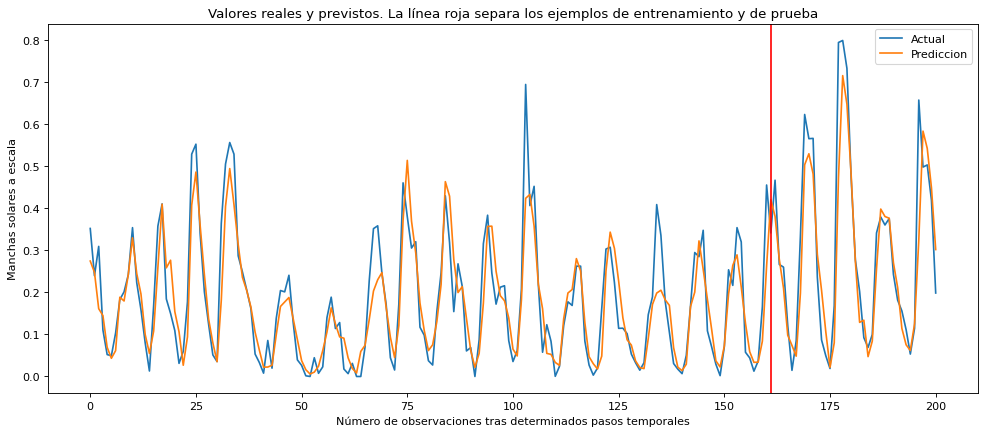

In [8]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Prediccion'])
    plt.xlabel('Número de observaciones tras determinados pasos temporales')
    plt.ylabel('Manchas solares a escala')
    plt.title('Valores reales y previstos. La línea roja separa los ejemplos de entrenamiento y de prueba')
plot_result(trainY, testY, train_predict, test_predict)
print_error(trainY, testY, train_predict, test_predict)

Epoch 1/30


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 1s - 5ms/step - loss: 0.0632
Epoch 2/30
225/225 - 0s - 1ms/step - loss: 0.0182
Epoch 3/30
225/225 - 0s - 1ms/step - loss: 0.0106
Epoch 4/30
225/225 - 0s - 963us/step - loss: 0.0090
Epoch 5/30
225/225 - 0s - 2ms/step - loss: 0.0081
Epoch 6/30
225/225 - 0s - 992us/step - loss: 0.0072
Epoch 7/30
225/225 - 0s - 1ms/step - loss: 0.0067
Epoch 8/30
225/225 - 0s - 1ms/step - loss: 0.0062
Epoch 9/30
225/225 - 0s - 1ms/step - loss: 0.0059
Epoch 10/30
225/225 - 0s - 1ms/step - loss: 0.0056
Epoch 11/30
225/225 - 0s - 1ms/step - loss: 0.0053
Epoch 12/30
225/225 - 0s - 1ms/step - loss: 0.0051
Epoch 13/30
225/225 - 0s - 1ms/step - loss: 0.0051
Epoch 14/30
225/225 - 0s - 1ms/step - loss: 0.0047
Epoch 15/30
225/225 - 0s - 1ms/step - loss: 0.0046
Epoch 16/30
225/225 - 0s - 1ms/step - loss: 0.0045
Epoch 17/30
225/225 - 0s - 1ms/step - loss: 0.0045
Epoch 18/30
225/225 - 0s - 2ms/step - loss: 0.0044
Epoch 19/30
225/225 - 0s - 966us/step - loss: 0.0043
Epoch 20/30
225/225 - 0s - 1ms/step - loss: 0

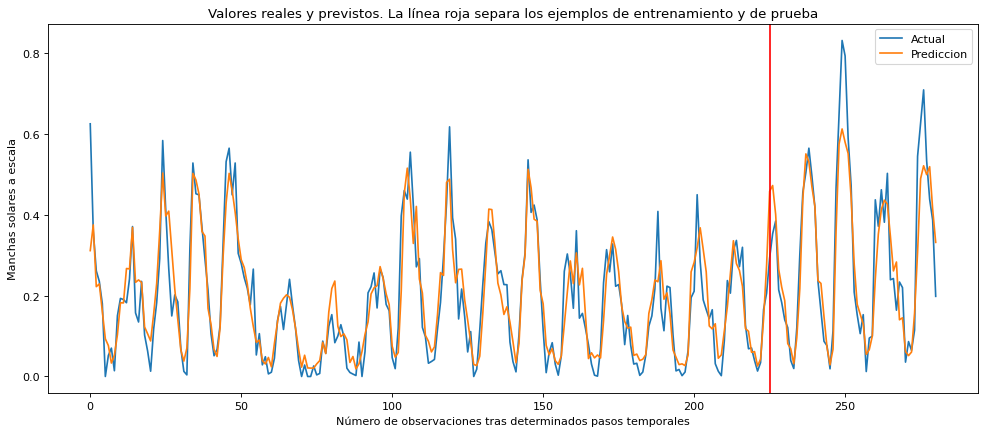

In [15]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)


Epoch 1/35


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 1s - 6ms/step - loss: 0.0484
Epoch 2/35
225/225 - 0s - 1ms/step - loss: 0.0226
Epoch 3/35
225/225 - 0s - 1ms/step - loss: 0.0115
Epoch 4/35
225/225 - 0s - 989us/step - loss: 0.0062
Epoch 5/35
225/225 - 0s - 982us/step - loss: 0.0047
Epoch 6/35
225/225 - 0s - 999us/step - loss: 0.0042
Epoch 7/35
225/225 - 0s - 1ms/step - loss: 0.0041
Epoch 8/35
225/225 - 0s - 1ms/step - loss: 0.0039
Epoch 9/35
225/225 - 0s - 1ms/step - loss: 0.0039
Epoch 10/35
225/225 - 0s - 1ms/step - loss: 0.0039
Epoch 11/35
225/225 - 0s - 1ms/step - loss: 0.0038
Epoch 12/35
225/225 - 0s - 1ms/step - loss: 0.0038
Epoch 13/35
225/225 - 0s - 1ms/step - loss: 0.0038
Epoch 14/35
225/225 - 0s - 1ms/step - loss: 0.0039
Epoch 15/35
225/225 - 0s - 1ms/step - loss: 0.0039
Epoch 16/35
225/225 - 0s - 1ms/step - loss: 0.0039
Epoch 17/35
225/225 - 0s - 990us/step - loss: 0.0038
Epoch 18/35
225/225 - 0s - 914us/step - loss: 0.0039
Epoch 19/35
225/225 - 0s - 1ms/step - loss: 0.0039
Epoch 20/35
225/225 - 0s - 952us/step - l

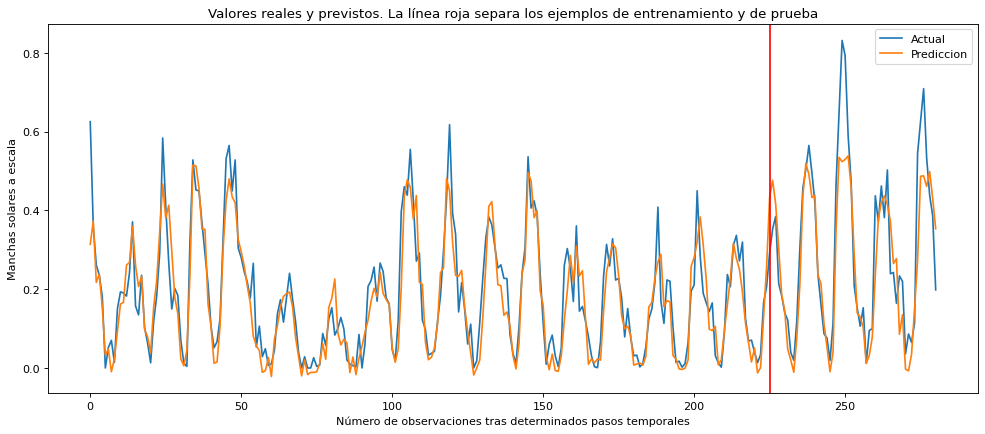

In [16]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=35, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/25


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 1s - 5ms/step - loss: 0.0362
Epoch 2/25
225/225 - 0s - 923us/step - loss: 0.0162
Epoch 3/25
225/225 - 0s - 934us/step - loss: 0.0102
Epoch 4/25
225/225 - 0s - 920us/step - loss: 0.0076
Epoch 5/25
225/225 - 0s - 931us/step - loss: 0.0064
Epoch 6/25
225/225 - 0s - 932us/step - loss: 0.0058
Epoch 7/25
225/225 - 0s - 931us/step - loss: 0.0054
Epoch 8/25
225/225 - 0s - 968us/step - loss: 0.0053
Epoch 9/25
225/225 - 0s - 1ms/step - loss: 0.0050
Epoch 10/25
225/225 - 0s - 1ms/step - loss: 0.0048
Epoch 11/25
225/225 - 0s - 1ms/step - loss: 0.0047
Epoch 12/25
225/225 - 0s - 1ms/step - loss: 0.0047
Epoch 13/25
225/225 - 0s - 986us/step - loss: 0.0045
Epoch 14/25
225/225 - 0s - 916us/step - loss: 0.0045
Epoch 15/25
225/225 - 0s - 1ms/step - loss: 0.0045
Epoch 16/25
225/225 - 0s - 1ms/step - loss: 0.0044
Epoch 17/25
225/225 - 0s - 948us/step - loss: 0.0044
Epoch 18/25
225/225 - 0s - 949us/step - loss: 0.0044
Epoch 19/25
225/225 - 0s - 951us/step - loss: 0.0043
Epoch 20/25
225/225 - 0s - 

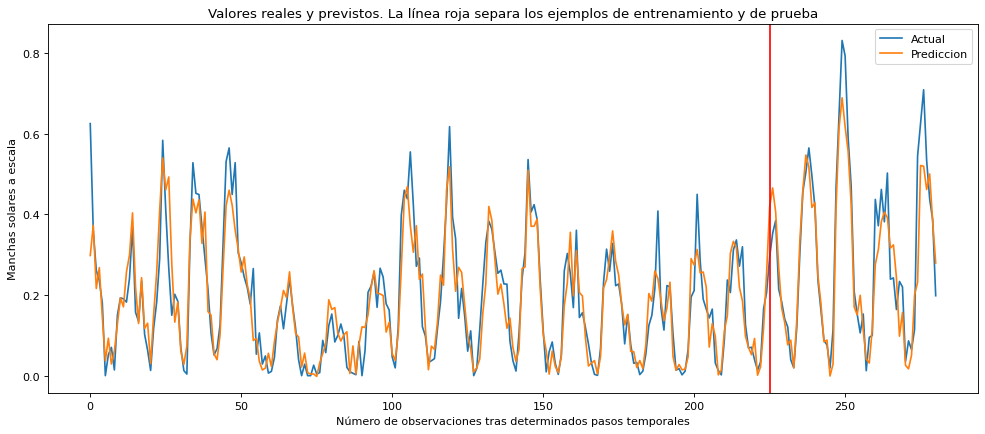

In [17]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/35


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 1s - 6ms/step - loss: 2.1133
Epoch 2/35
225/225 - 0s - 995us/step - loss: 0.4978
Epoch 3/35
225/225 - 0s - 906us/step - loss: 0.2885
Epoch 4/35
225/225 - 0s - 901us/step - loss: 0.1860
Epoch 5/35
225/225 - 0s - 882us/step - loss: 0.1316
Epoch 6/35
225/225 - 0s - 1ms/step - loss: 0.1032
Epoch 7/35
225/225 - 0s - 1ms/step - loss: 0.0857
Epoch 8/35
225/225 - 0s - 943us/step - loss: 0.0744
Epoch 9/35
225/225 - 0s - 1ms/step - loss: 0.0651
Epoch 10/35
225/225 - 0s - 1ms/step - loss: 0.0572
Epoch 11/35
225/225 - 0s - 985us/step - loss: 0.0498
Epoch 12/35
225/225 - 0s - 903us/step - loss: 0.0427
Epoch 13/35
225/225 - 0s - 1ms/step - loss: 0.0371
Epoch 14/35
225/225 - 0s - 903us/step - loss: 0.0320
Epoch 15/35
225/225 - 0s - 1ms/step - loss: 0.0274
Epoch 16/35
225/225 - 0s - 1ms/step - loss: 0.0232
Epoch 17/35
225/225 - 0s - 976us/step - loss: 0.0196
Epoch 18/35
225/225 - 0s - 938us/step - loss: 0.0170
Epoch 19/35
225/225 - 0s - 934us/step - loss: 0.0139
Epoch 20/35
225/225 - 0s - 94

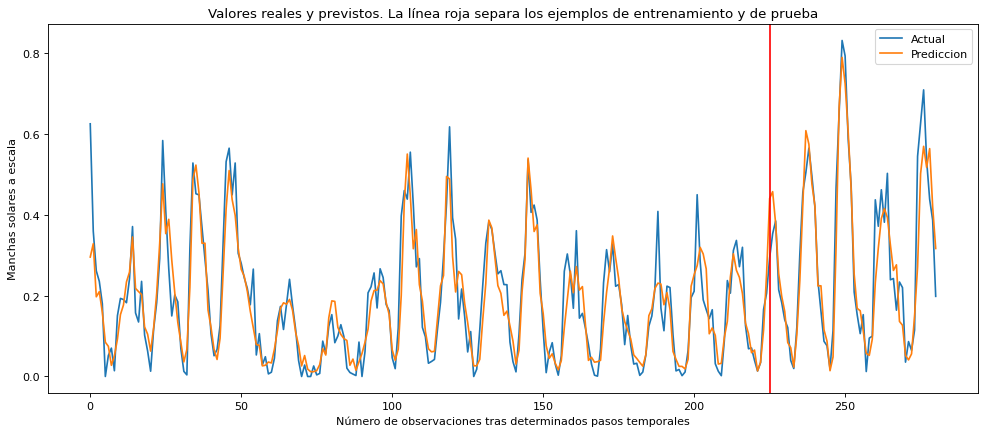

In [19]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=35, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/25


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 1s - 5ms/step - loss: 0.1072
Epoch 2/25
225/225 - 0s - 920us/step - loss: 0.0547
Epoch 3/25
225/225 - 0s - 1ms/step - loss: 0.0361
Epoch 4/25
225/225 - 0s - 918us/step - loss: 0.0270
Epoch 5/25
225/225 - 0s - 949us/step - loss: 0.0217
Epoch 6/25
225/225 - 0s - 905us/step - loss: 0.0176
Epoch 7/25
225/225 - 0s - 891us/step - loss: 0.0146
Epoch 8/25
225/225 - 0s - 937us/step - loss: 0.0124
Epoch 9/25
225/225 - 0s - 918us/step - loss: 0.0106
Epoch 10/25
225/225 - 0s - 932us/step - loss: 0.0093
Epoch 11/25
225/225 - 0s - 878us/step - loss: 0.0084
Epoch 12/25
225/225 - 0s - 901us/step - loss: 0.0076
Epoch 13/25
225/225 - 0s - 931us/step - loss: 0.0070
Epoch 14/25
225/225 - 0s - 869us/step - loss: 0.0065
Epoch 15/25
225/225 - 0s - 914us/step - loss: 0.0062
Epoch 16/25
225/225 - 0s - 944us/step - loss: 0.0060
Epoch 17/25
225/225 - 0s - 866us/step - loss: 0.0055
Epoch 18/25
225/225 - 0s - 903us/step - loss: 0.0055
Epoch 19/25
225/225 - 0s - 882us/step - loss: 0.0051
Epoch 20/25
225/2

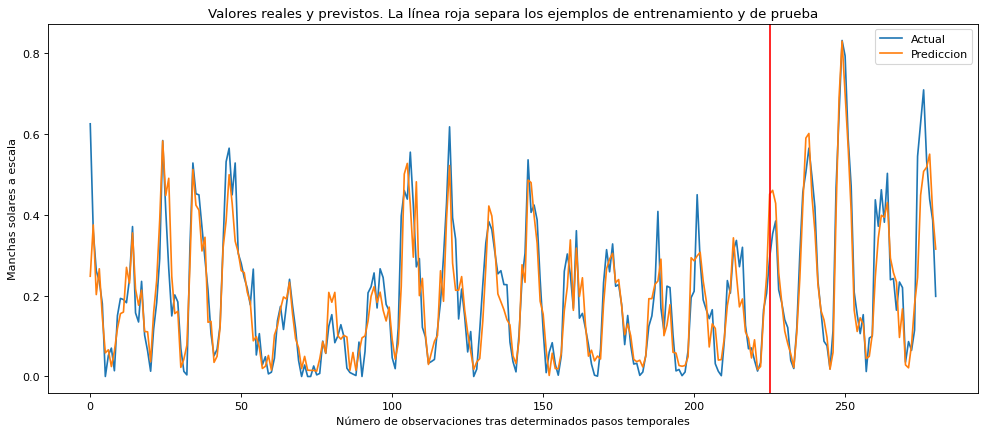

In [20]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/60


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 - 1s - 15ms/step - loss: 0.0841
Epoch 2/60
81/81 - 0s - 2ms/step - loss: 0.0361
Epoch 3/60
81/81 - 0s - 1ms/step - loss: 0.0258
Epoch 4/60
81/81 - 0s - 2ms/step - loss: 0.0201
Epoch 5/60
81/81 - 0s - 2ms/step - loss: 0.0168
Epoch 6/60
81/81 - 0s - 2ms/step - loss: 0.0143
Epoch 7/60
81/81 - 0s - 1ms/step - loss: 0.0126
Epoch 8/60
81/81 - 0s - 1ms/step - loss: 0.0112
Epoch 9/60
81/81 - 0s - 2ms/step - loss: 0.0102
Epoch 10/60
81/81 - 0s - 1ms/step - loss: 0.0096
Epoch 11/60
81/81 - 0s - 2ms/step - loss: 0.0092
Epoch 12/60
81/81 - 0s - 2ms/step - loss: 0.0086
Epoch 13/60
81/81 - 0s - 1ms/step - loss: 0.0082
Epoch 14/60
81/81 - 0s - 2ms/step - loss: 0.0079
Epoch 15/60
81/81 - 0s - 2ms/step - loss: 0.0076
Epoch 16/60
81/81 - 0s - 2ms/step - loss: 0.0073
Epoch 17/60
81/81 - 0s - 1ms/step - loss: 0.0069
Epoch 18/60
81/81 - 0s - 1ms/step - loss: 0.0067
Epoch 19/60
81/81 - 0s - 2ms/step - loss: 0.0064
Epoch 20/60
81/81 - 0s - 2ms/step - loss: 0.0062
Epoch 21/60
81/81 - 0s - 2ms/step - los

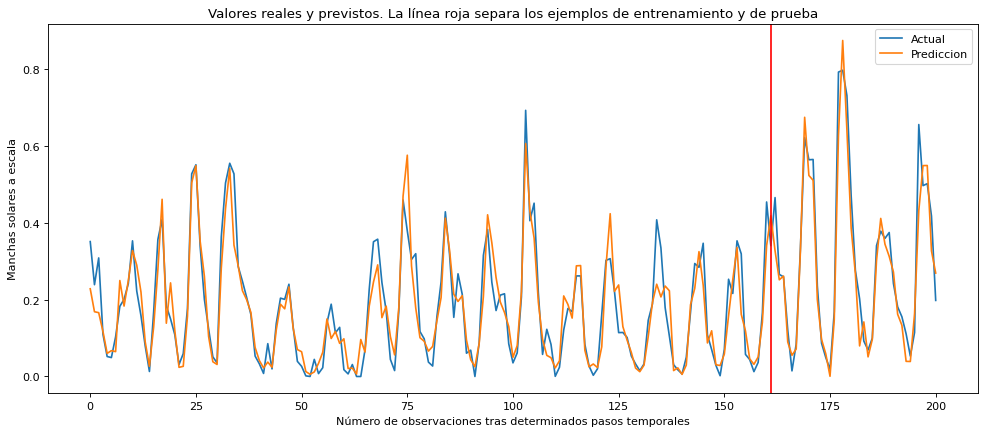

In [43]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 14
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=60, batch_size=2, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/30


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 - 1s - 16ms/step - loss: 6.6737
Epoch 2/30
81/81 - 0s - 1ms/step - loss: 1.6088
Epoch 3/30
81/81 - 0s - 1ms/step - loss: 0.8893
Epoch 4/30
81/81 - 0s - 1ms/step - loss: 0.6068
Epoch 5/30
81/81 - 0s - 1ms/step - loss: 0.4648
Epoch 6/30
81/81 - 0s - 1ms/step - loss: 0.3721
Epoch 7/30
81/81 - 0s - 1ms/step - loss: 0.3092
Epoch 8/30
81/81 - 0s - 1ms/step - loss: 0.2671
Epoch 9/30
81/81 - 0s - 1ms/step - loss: 0.2295
Epoch 10/30
81/81 - 0s - 1ms/step - loss: 0.2003
Epoch 11/30
81/81 - 0s - 1ms/step - loss: 0.1768
Epoch 12/30
81/81 - 0s - 1ms/step - loss: 0.1554
Epoch 13/30
81/81 - 0s - 1ms/step - loss: 0.1386
Epoch 14/30
81/81 - 0s - 2ms/step - loss: 0.1280
Epoch 15/30
81/81 - 0s - 2ms/step - loss: 0.1121
Epoch 16/30
81/81 - 0s - 1ms/step - loss: 0.1009
Epoch 17/30
81/81 - 0s - 1ms/step - loss: 0.0916
Epoch 18/30
81/81 - 0s - 1ms/step - loss: 0.0824
Epoch 19/30
81/81 - 0s - 1ms/step - loss: 0.0750
Epoch 20/30
81/81 - 0s - 1ms/step - loss: 0.0685
Epoch 21/30
81/81 - 0s - 1ms/step - los

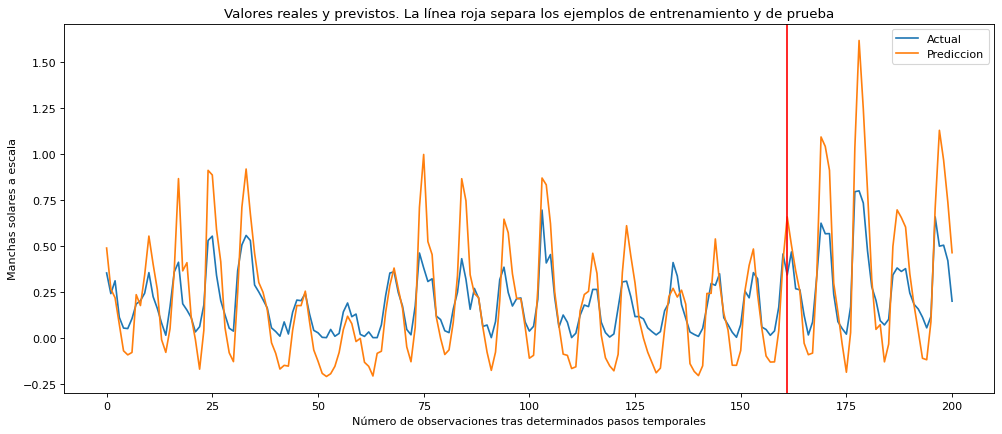

In [10]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 14
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=30, batch_size=2, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/60


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 1s - 15ms/step - loss: 0.1516
Epoch 2/60
94/94 - 0s - 1ms/step - loss: 0.0410
Epoch 3/60
94/94 - 0s - 1ms/step - loss: 0.0307
Epoch 4/60
94/94 - 0s - 1ms/step - loss: 0.0234
Epoch 5/60
94/94 - 0s - 1ms/step - loss: 0.0197
Epoch 6/60
94/94 - 0s - 1ms/step - loss: 0.0165
Epoch 7/60
94/94 - 0s - 1ms/step - loss: 0.0147
Epoch 8/60
94/94 - 0s - 1ms/step - loss: 0.0132
Epoch 9/60
94/94 - 0s - 1ms/step - loss: 0.0118
Epoch 10/60
94/94 - 0s - 1ms/step - loss: 0.0109
Epoch 11/60
94/94 - 0s - 1ms/step - loss: 0.0101
Epoch 12/60
94/94 - 0s - 1ms/step - loss: 0.0095
Epoch 13/60
94/94 - 0s - 1ms/step - loss: 0.0087
Epoch 14/60
94/94 - 0s - 1ms/step - loss: 0.0082
Epoch 15/60
94/94 - 0s - 1ms/step - loss: 0.0082
Epoch 16/60
94/94 - 0s - 1ms/step - loss: 0.0073
Epoch 17/60
94/94 - 0s - 1ms/step - loss: 0.0072
Epoch 18/60
94/94 - 0s - 1ms/step - loss: 0.0068
Epoch 19/60
94/94 - 0s - 1ms/step - loss: 0.0065
Epoch 20/60
94/94 - 0s - 1ms/step - loss: 0.0063
Epoch 21/60
94/94 - 0s - 1ms/step - los

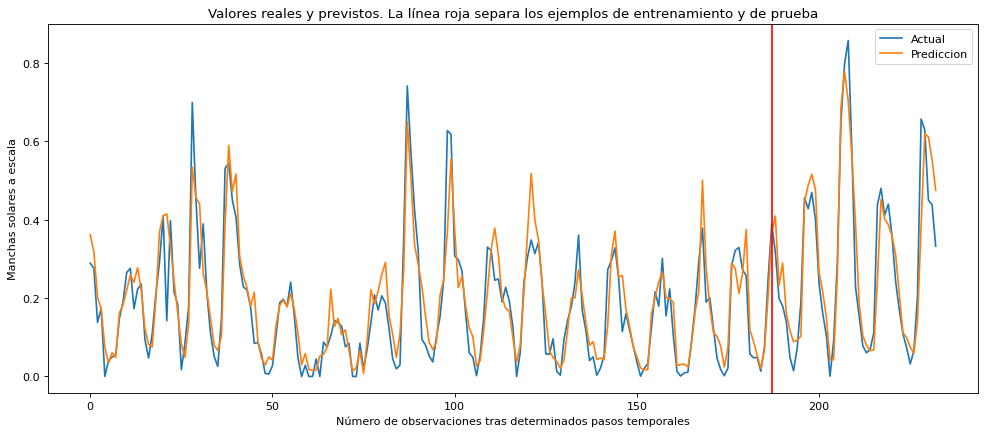

In [44]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=60, batch_size=2, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

0.0841
0.0361
0.0258
0.0201
0.0168
0.0143
0.0126
0.0112
0.0102
0.0096
0.0092
0.0086
0.0082
0.0079
0.0076
0.0073
0.0069
0.0067
0.0064
0.0062
0.0059
0.0058
0.0056
0.0053
0.0051
0.0052
0.0049
0.0048
0.0046
0.0045
0.0045
0.0044
0.0042
0.0042
0.0041
0.0040
0.0040
0.0040
0.0039
0.0038
0.0038
0.0037
0.0038
0.0037
0.0037
0.0037
0.0036
0.0035
0.0036
0.0035
0.0035
0.0037
0.0035
0.0034
0.0035
0.0034
0.0034
0.0033
0.0034
0.0034


Epoch 1/25


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 - 1s - 48ms/step - loss: 0.5599
Epoch 2/25
23/23 - 0s - 2ms/step - loss: 0.1896
Epoch 3/25
23/23 - 0s - 2ms/step - loss: 0.0770
Epoch 4/25
23/23 - 0s - 2ms/step - loss: 0.0374
Epoch 5/25
23/23 - 0s - 2ms/step - loss: 0.0227
Epoch 6/25
23/23 - 0s - 2ms/step - loss: 0.0158
Epoch 7/25
23/23 - 0s - 2ms/step - loss: 0.0127
Epoch 8/25
23/23 - 0s - 2ms/step - loss: 0.0110
Epoch 9/25
23/23 - 0s - 2ms/step - loss: 0.0099
Epoch 10/25
23/23 - 0s - 2ms/step - loss: 0.0091
Epoch 11/25
23/23 - 0s - 2ms/step - loss: 0.0082
Epoch 12/25
23/23 - 0s - 2ms/step - loss: 0.0077
Epoch 13/25
23/23 - 0s - 2ms/step - loss: 0.0069
Epoch 14/25
23/23 - 0s - 2ms/step - loss: 0.0064
Epoch 15/25
23/23 - 0s - 2ms/step - loss: 0.0061
Epoch 16/25
23/23 - 0s - 2ms/step - loss: 0.0056
Epoch 17/25
23/23 - 0s - 2ms/step - loss: 0.0054
Epoch 18/25
23/23 - 0s - 1ms/step - loss: 0.0054
Epoch 19/25
23/23 - 0s - 2ms/step - loss: 0.0050
Epoch 20/25
23/23 - 0s - 2ms/step - loss: 0.0050
Epoch 21/25
23/23 - 0s - 2ms/step - los

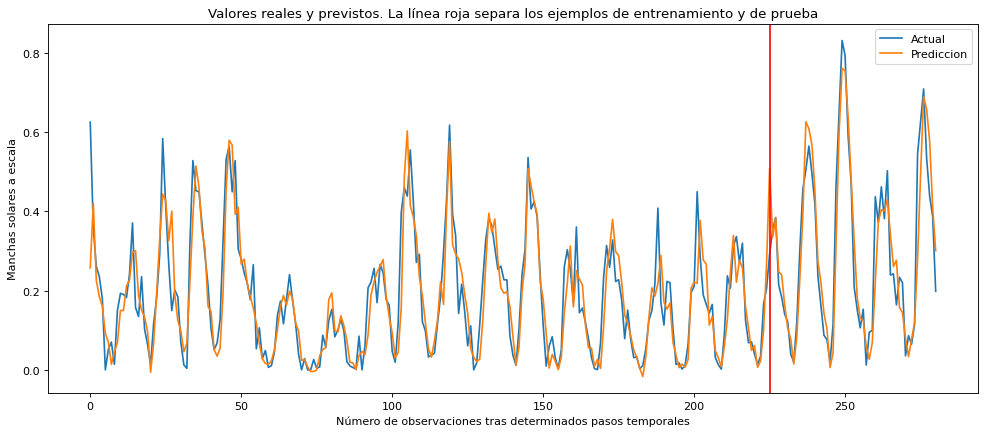

In [22]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=25, batch_size=10, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)